# Numpy Shapes

In [340]:
### This notebook uses the "Hide input" nbextension. ###

In [341]:
import numpy as np
from pandas import DataFrame, Series
from termcolor import colored
from matplotlib import pyplot as plt

In [342]:
from IPython.display import display, HTML
display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}

.output_text pre {
  white-space: pre;
  font-size: 20px;
  text-align: center;
  line-height: 150%;
}
</style>
"""))

In [343]:
colors = ['red',"green","blue","magenta"]

def colored_index(indices):
    string = []
    #string.append('(')
    for i, size in enumerate(indices):
        string.append(colored(size, colors[i]))
    return ', '.join(string)
 

def colored_shape(shape):
    indices_str = colored_index(shape)
    if len(shape) == 1:
        indices_str = indices_str + ','
    return '(' + indices_str + ')'

def colored_sub(indices):
    indices_str = colored_index(indices)
    return '[' + indices_str + ']'

def colored_table_rec(table, index):
    if not isinstance(table, np.ndarray):
        return str(table)

    strings = []
    for sub in table:
        strings.append(colored_table_rec(sub,index+1))
    string = colored(',', colors[index]).join(strings)
    return colored('[', colors[index]) \
           + string \
           + colored(']', colors[index])

def colored_table(table):
    return colored_table_rec(table, 0)


def display_table(table, shape, exemples=[], ext_exemples=[]):

    table = table.reshape(shape)
    print(colored_shape(table.shape))
    print(colored_table(table))

    if len(ext_exemples) >= 1:
         print('\n')
    
    for exemple in ext_exemples:
        value = table
        for i,index in enumerate(exemple):
            value = value[index]
            print('table{} = {}'.format(colored_sub(exemple[:i+1]),
                                        colored_table_rec(value,i+1)))
    if len(exemples) >= 1:
        print('\n')
    
    for exemple in exemples:
        value = table
        for index in exemple:
            value = value[index]
        print('table{} = {}'.format(colored_sub(exemple),
                                    value))

def display_image(img):
    plt.imshow(img*255)
    plt.show()

def display_images(imgs):
    nb_images = imgs.shape[0]
    for i,img in enumerate(imgs):
        plt.subplot(1, nb_images, i+1)
        plt.imshow(img*255)
    plt.show()  
    


## Shapes and reshape

In [344]:
table = np.array([x+1 for x in range(8)])

### 1D shape

In [345]:
display_table(table, (-1,), [[0],[6]])

(8,)
[1,2,3,4,5,6,7,8]


table[0] = 1
table[6] = 7


### 2D shape

In [346]:
display_table(table, (2,4), [[0,3],[1,2]], [[0],[1]])

(2, 4)
[[1,2,3,4],[5,6,7,8]]


table[0] = [1,2,3,4]
table[1] = [5,6,7,8]


table[0, 3] = 4
table[1, 2] = 7


### 3D shape

In [347]:
display_table(table, (2,2,2), [[0,1,0],[1,0,1]], [[0],[1,1,1]])

(2, 2, 2)
[[[1,2],[3,4]],[[5,6],[7,8]]]


table[0] = [[1,2],[3,4]]
table[1] = [[5,6],[7,8]]
table[1, 1] = [7,8]
table[1, 1, 1] = 8


table[0, 1, 0] = 3
table[1, 0, 1] = 6


### 4D shape

In [348]:
display_table(table, (2,2,2,1), [], [[0,0,1,0]])

(2, 2, 2, 1)
[[[[1],[2]],[[3],[4]]],[[[5],[6]],[[7],[8]]]]


table[0] = [[[1],[2]],[[3],[4]]]
table[0, 0] = [[1],[2]]
table[0, 0, 1] = [2]
table[0, 0, 1, 0] = 2


## Images

### A single square image

In [349]:
image = np.array([0,1,0,1,1,1,0,1,0])
display_table(image, image.shape)

(9,)
[0,1,0,1,1,1,0,1,0]


 9 lines, 1 column 

(9, 1)
[[0],[1],[0],[1],[1],[1],[0],[1],[0]]


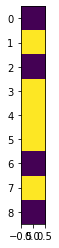

In [350]:
shape = (-1,1)
display_table(image, shape)
display_image(image.reshape(shape))

1 lines, 9 columns

(1, 9)
[[0,1,0,1,1,1,0,1,0]]


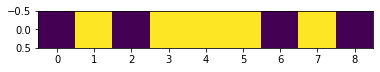

In [351]:
shape = (1,-1)
display_table(image, shape)
display_image(image.reshape(shape))

3 lines, 3 columns

(3, 3)
[[0,1,0],[1,1,1],[0,1,0]]


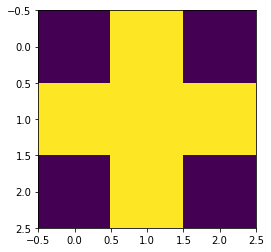

In [352]:
shape = (3,3)
display_table(image, shape)
display_image(image.reshape(shape))

A list containg a single image.

In [364]:
shape = (1,3,3)
display_table(image, shape)

(1, 3, 3)
[[[0,1,0],[1,1,1],[0,1,0]]]


An image with 1 channel.

In [365]:
shape = (3,3,1)
display_table(image, shape)

(3, 3, 1)
[[[0],[1],[0]],[[1],[1],[1]],[[0],[1],[0]]]


### 2 square images

In [353]:
images = np.array([0,1,0,1,1,1,0,1,0,1,0,1,0,0,0,1,0,1])
display_table(images, images.shape)

(18,)
[0,1,0,1,1,1,0,1,0,1,0,1,0,0,0,1,0,1]


(2, 3, 3)
[[[0,1,0],[1,1,1],[0,1,0]],[[1,0,1],[0,0,0],[1,0,1]]]


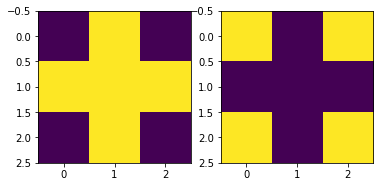

In [354]:
shape = (2,3,3)
display_table(images, shape)
display_images(images.reshape(shape))

### 1 channel images
An image with 1 channel is not the same as an image with no channel at all.

- Matplotlib does not support images with only 1 channel. There is no dimension for intensity.

(3, 3)
[[0,1,0],[1,0,1],[0,1,0]]


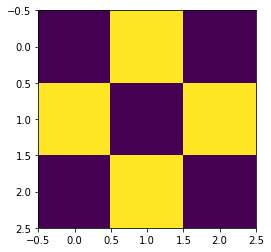

In [355]:
image1c = np.array([[0,1,0],[1,0,1],[0,1,0]])
display_table(image1c, image1c.shape)
display_image(image1c)

- Keras requires an extra dimension of size 1 for greyscale images.

In [356]:
shape=(3,3,1)
display_table(image1c, shape)

(3, 3, 1)
[[[0],[1],[0]],[[1],[0],[1]],[[0],[1],[0]]]


### 1 image with 3 channels

In [357]:
image3 = np.array([0]*3+[1,1,0]*2+[0]*3)
display_table(image3, image3.shape)

(12,)
[0,0,0,1,1,0,1,1,0,0,0,0]


(2, 2, 3)
[[[0,0,0],[1,1,0]],[[1,1,0],[0,0,0]]]


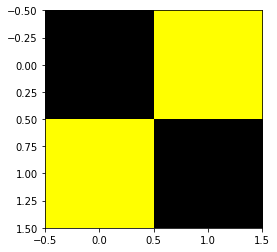

In [358]:
shape = (2,2,3)
display_table(image3, shape)
display_image(image3.reshape(shape))

## Exercices

### 3D table

In [359]:
exercice_table = np.array([0]*10 + [1] + [0]*7)
display_table(exercice_table, exercice_table.shape)

(18,)
[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0]


Modify the shape below.
- The table has a depth of 3.
- The table has a width of 2.

If you get it right table[1,1,1] should be 1.

In [ ]:
shape = (18,)

display_table(exercice_table, shape, [[1,1,1]])

### 2 square images with 3 channels

In [361]:
exercice_images = np.array([0]*3+[1]*6+[0]*3 + [1]*3+[0]*6+[1]*3)
display_table(exercice1, exercice_images.shape)

(24,)
[0,0,0,1,1,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,1,1,1]


Modify the shape below in order to get 2 checkerboard images.
- The images have 3 channels.
- There is 2 images.
- The images are square. What size should they be?

In [ ]:
shape = (24,)

display_table(exercice_images, shape)
display_images(exercice_images.reshape(shape))